## V5589 Sgr Spectral Index

In [37]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
#importing the data

In [39]:
data = ([56040.4,	1,	33,	0.032,	0.025,	1.00E-10,	0.05],
    [56069.0,	'A',	225.3,	13.80,	2.000,	1.00E-10,	0.05],
    [56084.4,	2,	5,	1.089,	0.028,	1.00E-10,	0.05],
    [56084.4,	2,	6.8,	1.381,	0.025,	1.00E-10,	0.05],
    [56092.2,	3,	13.3,	3.523,	0.042,	1.00E-10,	0.05],
    [56092.2,	3,	16,	3.98,	0.049,	1.00E-10,	0.05],
    [56092.2,	3,	28.2,	5.727,	0.098,	1.00E-10,	0.05],
    [56092.2,	3,	36.5,	5.961,	0.139,	1.00E-10,	0.05],
    [56100.3,	4,	2.5,	3.094,	0.037,	1.00E-10,	0.05],
    [56100.3,	4,	3.5,	3.201,	0.030,	1.00E-10,	0.05],
    [56100.3,	4,	5,	3.423,	0.023,	1.00E-10,	0.05],
    [56100.3,	4,	6.8,	3.629,	0.025,	1.00E-10,	0.05],
    [56100.3,	4,	8.5,	3.683,	0.052,	1.00E-10,	0.05],
    [56100.3,	4,	11.4,	3.779,	0.071,	1.00E-10,	0.05],
    [56117.9,	'B',	225.5,	0.000,	0.068,	1.00E-10,	0.05],
    [56119.1,	5,	1.35,	1.68,	0.120,	1.00E-10,	0.05],
    [56119.1,	5,	1.84,	1.391,	0.066,	1.00E-10,	0.05],
    [56119.1,	5,	4.74,	1.907,	0.027,	1.00E-10,	0.05],
    [56119.1,	5,	7.59,	1.921,	0.023,	1.00E-10,	0.05],
    [56128.3,	6,	17.5,	1.374,	0.091,	1.00E-10,	0.05],
    [56128.3,	6,	27.5,	1.438,	0.143,	1.00E-10,	0.05],
    [56128.3,	6,	36.5,	1.136,	0.194,	1.00E-10,	0.05],
    [56148.0,	7,	1.2555,	0.340,	0.071,	1.00E-10,	0.05],
    [56148.0,	7,	1.7715,	0.560,	0.072,	1.00E-10,	0.05],
    [56148.0,	7,	4.74,	0.521,	0.033,	1.00E-10,	0.05],
    [56148.0,	7,	7.59,	0.528,	0.025,	1.00E-10,	0.05],
    [56148.0,	7,	8.53,	0.556,	0.031,	1.00E-10,	0.05],
    [56148.0,	7,	11.38,	0.571,	0.060,	1.00E-10,	0.05],
    [56150.2,	8,	13.3,	0.495,	0.042,	1.00E-10,	0.05],
    [56150.2,	8,	17.45,	0.38,	0.049,	1.00E-10,	0.05],
    [56150.2,	8,	27.5,	0.469,	0.078,	1.00E-10,	0.05],
    [56150.2,	8,	36.5,	0.39,	0.086,	1.00E-10,	0.05],
    [56151.3,	8,	1.25,	0,	0.091,	1.00E-10,	0.05],
    [56151.3,	8,	1.80,	0.497,	0.088,	1.00E-10,	0.05],
    [56151.3,	8,	4.549,	0.502,	0.034,	1.00E-10,	0.05],
    [56151.3,	8,	7.399,	0.469,	0.025,	1.00E-10,	0.05],
    [56151.3,	8,	8.51,	0.443,	0.021,	1.00E-10,	0.05],
    [56151.3,	8,	11.34,	0.418,	0.035,	1.00E-10,	0.05],
    
#S4322
    [56167.0,	9,	1.36,	0.244,	0.049,	1.00E-10,	0.05],
    [56167.0,	9,	1.78,	0.431,	0.048,	1.00E-10,	0.05],

#12A-479
#56167.0	9	1.3835	0	0.075	1.00E-10	0.05
#56167.0	9	1.8035	0	0.029	1.00E-10	0.05
    [56167.0,	9,	4.608,	0.347,	0.028,	1.00E-10,	0.05],
    [56167.0,	9,	7.458,	0.292,	0.016,	1.00E-10,	0.05],
    [56167.0,	9,	8.5,	0.289,	0.018,	1.00E-10,	0.05],
    [56167.0,	9,	11.4,	0.368,	0.031,	1.00E-10,	0.05],

#12A-483
#56167.0	9	1.2555	0	0.086	1.00E-10	0.05
#56167.0	9	1.7395	0.346	0.093	1.00E-10	0.05
#56167.0	9	4.5490	0.282	0.036	1.00E-10	0.05
#56167.0	9	7.399	0.286	0.024	1.00E-10	0.05

    [56174.2,	10,	13.3,	0.188,	0.019,	1.00E-10,	0.05],
    [56174.2,	10,	17.45,	0.110,	0.029,	1.00E-10,	0.05],
    [56174.2,	10,	27.5,	0.106,	0.027,	1.00E-10,	0.05],
    [56174.2,	10,	36.5,	0.365,	0.131,	1.00E-10,	0.05],
    [56177.9,	11,	1.33,	0.225,	0.044,	1.00E-10,	0.05],
    [56177.9,	11,	1.77,	0.201,	0.042,	1.00E-10,	0.05],
    [56231.0,	12,	13.3,	0.035,	0.021,	1.00E-10,	0.05],
    [56231.0,	12,	17.4,	0.043,	0.027,	1.00E-10,	0.05],
    [56231.0,	12,	27.5,	0.060,	0.044,	1.00E-10,	0.05],
    [56231.0,	12,	36.5,	0.044,	0.052,	1.00E-10,	0.05],
    [56270.8,	13,	1.2555,	0,	0.083,	1.00E-10,	0.05],
    [56270.8,	13,	1.7395,	0,	0.084,	1.00E-10,	0.05],
    [56270.8,	13,	4.549,	0,	0.021,	1.00E-10,	0.05],
    [56270.8,	13,	7.399,	0,	0.016,	1.00E-10,	0.05],
    [56270.8,	13,	8.519,	0,	0.025,	1.00E-10,	0.05],
    [56270.8,	13,	11.399,	0,	0.030,	1.00E-10,	0.05],
    [56284.6,	14,	13.299,	0,	0.029,	1.00E-10,	0.05],
    [56284.6,	14,	17.449,	0,	0.035,	1.00E-10,	0.05],
    [56284.6,	14,	13.30,	0.047,	0.022,	1.00E-10,	0.05],
    [56284.6,	14,	17.45,	0.049,	0.026,	1.00E-10,	0.05],
    [56284.6,	14,	27.50,	0.036,	0.050,	1.00E-10,	0.05],
    [56284.6,	14,	36.50,	0.020,	0.068,	1.00E-10,	0.05],
    [56297.7,	15,	1.26,	0.0504,	0.102,	1.00E-10,	0.05],
    [56297.7,	15,	1.74,	-0.00249,	0.068,	1.00E-10,	0.05],
    [56297.7,	15,	4.55,	0.0328,	0.033,	1.00E-10,	0.05],
    [56297.7,	15,	7.399,	0.0288,	0.023,	1.00E-10,	0.05],
    [56297.7,	15,	8.52,	0.0286,	0.018,	1.00E-10,	0.05],
    [56297.7,	15,	11.4,	0.0413,	0.023,	1.00E-10,	0.05],
    [56347.7,	16,	1.26,	0.346,	0.503,	1.00E-10,	0.05],
    [56347.7,	16,	1.74,	-0.0272,	0.368,	1.00E-10,	0.05],
    [56347.7,	16,	4.55,	-0.232,	0.114,	1.00E-10,	0.05],
    [56347.7,	16,	7.399,	-0.00948,	0.160,	1.00E-10,	0.05],
    [56347.7,	16,	8.52,	0.465,	0.201,	1.00E-10,	0.05],
    [56347.7,	16,	11.4,	-0.0358,	0.301,	1.00E-10,	0.05],
    [56358.6,	17,	13.22,	0.025,	0.027,	1.00E-10,	0.05],
    [56358.6,	17,	17.45,	0.009,	0.025,	1.00E-10,	0.05],
    [56358.6,	17,	27.50,	0.046,	0.049,	1.00E-10,	0.05],
    [56358.6,	17,	36.50,	0.120,	0.062,	1.00E-10,	0.05],
    [56369.6,	17,	13.3,	-0.0319,	0.023,	1.00E-10,	0.05],
    [56369.6,	17,	17.4,	0.0240,	0.029,	1.00E-10,	0.05],
    [56369.6,	17,	27.5,	0.113,	0.065,	1.00E-10,	0.05],
    [56369.6,	17,	36.5,	0.0109,	0.083,	1.00E-10,	0.05],
    [56441.4,	18,	1.26,	0.0811,	0.396,	1.00E-10,	0.05],
    [56441.4,	18,	1.74,	-0.202,	0.326,	1.00E-10,	0.05],
    [56441.4,	18,	4.55,	0.0437,	0.033,	1.00E-10,	0.05],
    [56441.4,	18,	7.399,	-0.0098,	0.021,	1.00E-10,	0.05],
    [56441.4,	18,	8.52,	-0.00263,	0.018,	1.00E-10,	0.05],
    [56441.4,	18,	11.4,	-0.0266,	0.019,	1.00E-10,	0.05],
    [56446.2,	18,	13.3,	-0.0169,	0.024,	1.00E-10,	0.05],
    [56446.2,	18,	17.4,	0.0260,	0.029,	1.00E-10,	0.05],
    [56446.2,	18,	27.5,	0.112,	0.077,	1.00E-10,	0.05],
    [56446.2,	18,	36.5,	-0.0663,	0.095,	1.00E-10,	0.05],
    [56526.7,	19,	1.26,	-0.571,	0.276,	1.00E-10,	0.05],
    [56526.7,	19,	1.74,	-0.348,	0.169,	1.00E-10,	0.05],
    [56526.7,	19,	4.55,	-0.00306,	0.028,	1.00E-10,	0.05],
    [56526.7,	19,	7.40,	-0.0045,	0.019,	1.00E-10,	0.05],
    [56526.7,	19,	8.52,	0.00449,	0.022,	1.00E-10,	0.05],
    [56526.7,	19,	11.4,	-0.0051,	0.024,	1.00E-10,	0.05],
    [56530.7,	19,	13.3,	-0.00734,	0.031,	1.00E-10,	0.05],
    [56530.7,	19,	17.4,	-0.00912,	0.053,	1.00E-10,	0.05],
    [56530.7,	19,	27.5,	0.0271,	0.011,	1.00E-10,	0.05],
    [56530.7,	19,	36.5,	0.110,	0.110,	1.00E-10,	0.05],
       )

df =  pd.DataFrame(data, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

In [40]:
#now to seperate it into days

In [41]:
E1=(    [56040.4,	1,	33,	0.032,	0.025,	1.00E-10,	0.05],)

E2=(    [56069.0,	'A',	225.3,	13.80,	2.000,	1.00E-10,	0.05],)

E3=(    [56084.4,	2,	5,	1.089,	0.028,	1.00E-10,	0.05],
    [56084.4,	2,	6.8,	1.381,	0.025,	1.00E-10,	0.05],)

E4=(    [56092.2,	3,	13.3,	3.523,	0.042,	1.00E-10,	0.05],
    [56092.2,	3,	16,	3.98,	0.049,	1.00E-10,	0.05],
    [56092.2,	3,	28.2,	5.727,	0.098,	1.00E-10,	0.05],
    [56092.2,	3,	36.5,	5.961,	0.139,	1.00E-10,	0.05],)

E5=(
    [56100.3,	4,	2.5,	3.094,	0.037,	1.00E-10,	0.05],
    [56100.3,	4,	3.5,	3.201,	0.030,	1.00E-10,	0.05],
    [56100.3,	4,	5,	3.423,	0.023,	1.00E-10,	0.05],
    [56100.3,	4,	6.8,	3.629,	0.025,	1.00E-10,	0.05],
    [56100.3,	4,	8.5,	3.683,	0.052,	1.00E-10,	0.05],
    [56100.3,	4,	11.4,	3.779,	0.071,	1.00E-10,	0.05],)

E6 =(
    [56117.9,	'B',	225.5,	0.000,	0.068,	1.00E-10,	0.05],)

E7 =(
    [56119.1,	5,	1.35,	1.68,	0.120,	1.00E-10,	0.05],
    [56119.1,	5,	1.84,	1.391,	0.066,	1.00E-10,	0.05],
    [56119.1,	5,	4.74,	1.907,	0.027,	1.00E-10,	0.05],
    [56119.1,	5,	7.59,	1.921,	0.023,	1.00E-10,	0.05],)

E8 =(
    [56128.3,	6,	17.5,	1.374,	0.091,	1.00E-10,	0.05],
    [56128.3,	6,	27.5,	1.438,	0.143,	1.00E-10,	0.05],
    [56128.3,	6,	36.5,	1.136,	0.194,	1.00E-10,	0.05],)

E9 = (
    [56148.0,	7,	1.2555,	0.340,	0.071,	1.00E-10,	0.05],
    [56148.0,	7,	1.7715,	0.560,	0.072,	1.00E-10,	0.05],
    [56148.0,	7,	4.74,	0.521,	0.033,	1.00E-10,	0.05],
    [56148.0,	7,	7.59,	0.528,	0.025,	1.00E-10,	0.05],
    [56148.0,	7,	8.53,	0.556,	0.031,	1.00E-10,	0.05],
    [56148.0,	7,	11.38,	0.571,	0.060,	1.00E-10,	0.05],)

E10=(
    [56150.2,	8,	13.3,	0.495,	0.042,	1.00E-10,	0.05],
    [56150.2,	8,	17.45,	0.38,	0.049,	1.00E-10,	0.05],
    [56150.2,	8,	27.5,	0.469,	0.078,	1.00E-10,	0.05],
    [56150.2,	8,	36.5,	0.39,	0.086,	1.00E-10,	0.05],
    [56151.3,	8,	1.25,	0,	0.091,	1.00E-10,	0.05],
    [56151.3,	8,	1.80,	0.497,	0.088,	1.00E-10,	0.05],
    [56151.3,	8,	4.549,	0.502,	0.034,	1.00E-10,	0.05],
    [56151.3,	8,	7.399,	0.469,	0.025,	1.00E-10,	0.05],
    [56151.3,	8,	8.51,	0.443,	0.021,	1.00E-10,	0.05],
    [56151.3,	8,	11.34,	0.418,	0.035,	1.00E-10,	0.05],)

E11 = (
#S4322
    [56167.0,	9,	1.36,	0.244,	0.049,	1.00E-10,	0.05],
    [56167.0,	9,	1.78,	0.431,	0.048,	1.00E-10,	0.05],
#12A-479
#56167.0	9	1.3835	0	0.075	1.00E-10	0.05
#56167.0	9	1.8035	0	0.029	1.00E-10	0.05
    [56167.0,	9,	4.608,	0.347,	0.028,	1.00E-10,	0.05],
    [56167.0,	9,	7.458,	0.292,	0.016,	1.00E-10,	0.05],
    [56167.0,	9,	8.5,	0.289,	0.018,	1.00E-10,	0.05],
    [56167.0,	9,	11.4,	0.368,	0.031,	1.00E-10,	0.05],
#12A-483
#56167.0	9	1.2555	0	0.086	1.00E-10	0.05
#56167.0	9	1.7395	0.346	0.093	1.00E-10	0.05
#56167.0	9	4.5490	0.282	0.036	1.00E-10	0.05
#56167.0	9	7.399	0.286	0.024	1.00E-10	0.05
)

E12 = (
    [56174.2,	10,	13.3,	0.188,	0.019,	1.00E-10,	0.05],
    [56174.2,	10,	17.45,	0.110,	0.029,	1.00E-10,	0.05],
    [56174.2,	10,	27.5,	0.106,	0.027,	1.00E-10,	0.05],
    [56174.2,	10,	36.5,	0.365,	0.131,	1.00E-10,	0.05],)

E13= (
    [56177.9,	11,	1.33,	0.225,	0.044,	1.00E-10,	0.05],
    [56177.9,	11,	1.77,	0.201,	0.042,	1.00E-10,	0.05],)

E14 = (
    [56231.0,	12,	13.3,	0.035,	0.021,	1.00E-10,	0.05],
    [56231.0,	12,	17.4,	0.043,	0.027,	1.00E-10,	0.05],
    [56231.0,	12,	27.5,	0.060,	0.044,	1.00E-10,	0.05],
    [56231.0,	12,	36.5,	0.044,	0.052,	1.00E-10,	0.05],)

E15 = (
    [56270.8,	13,	1.2555,	0,	0.083,	1.00E-10,	0.05],
    [56270.8,	13,	1.7395,	0,	0.084,	1.00E-10,	0.05],
    [56270.8,	13,	4.549,	0,	0.021,	1.00E-10,	0.05],
    [56270.8,	13,	7.399,	0,	0.016,	1.00E-10,	0.05],
    [56270.8,	13,	8.519,	0,	0.025,	1.00E-10,	0.05],
    [56270.8,	13,	11.399,	0,	0.030,	1.00E-10,	0.05],)

E16 = (
    [56284.6,	14,	13.299,	0,	0.029,	1.00E-10,	0.05],
    [56284.6,	14,	17.449,	0,	0.035,	1.00E-10,	0.05],
    [56284.6,	14,	13.30,	0.047,	0.022,	1.00E-10,	0.05],
    [56284.6,	14,	17.45,	0.049,	0.026,	1.00E-10,	0.05],
    [56284.6,	14,	27.50,	0.036,	0.050,	1.00E-10,	0.05],
    [56284.6,	14,	36.50,	0.020,	0.068,	1.00E-10,	0.05],)

E17 = (
    [56297.7,	15,	1.26,	0.0504,	0.102,	1.00E-10,	0.05],
    [56297.7,	15,	1.74,	-0.00249,	0.068,	1.00E-10,	0.05],
    [56297.7,	15,	4.55,	0.0328,	0.033,	1.00E-10,	0.05],
    [56297.7,	15,	7.399,	0.0288,	0.023,	1.00E-10,	0.05],
    [56297.7,	15,	8.52,	0.0286,	0.018,	1.00E-10,	0.05],
    [56297.7,	15,	11.4,	0.0413,	0.023,	1.00E-10,	0.05],)

E18 = (
    [56347.7,	16,	1.26,	0.346,	0.503,	1.00E-10,	0.05],
    [56347.7,	16,	1.74,	-0.0272,	0.368,	1.00E-10,	0.05],
    [56347.7,	16,	4.55,	-0.232,	0.114,	1.00E-10,	0.05],
    [56347.7,	16,	7.399,	-0.00948,	0.160,	1.00E-10,	0.05],
    [56347.7,	16,	8.52,	0.465,	0.201,	1.00E-10,	0.05],
    [56347.7,	16,	11.4,	-0.0358,	0.301,	1.00E-10,	0.05],)

E19 = (
    [56358.6,	17,	13.22,	0.025,	0.027,	1.00E-10,	0.05],
    [56358.6,	17,	17.45,	0.009,	0.025,	1.00E-10,	0.05],
    [56358.6,	17,	27.50,	0.046,	0.049,	1.00E-10,	0.05],
    [56358.6,	17,	36.50,	0.120,	0.062,	1.00E-10,	0.05],)

E20 = (
    [56369.6,	17,	13.3,	-0.0319,	0.023,	1.00E-10,	0.05],
    [56369.6,	17,	17.4,	0.0240,	0.029,	1.00E-10,	0.05],
    [56369.6,	17,	27.5,	0.113,	0.065,	1.00E-10,	0.05],
    [56369.6,	17,	36.5,	0.0109,	0.083,	1.00E-10,	0.05],)

E21 = (
    [56441.4,	18,	1.26,	0.0811,	0.396,	1.00E-10,	0.05],
    [56441.4,	18,	1.74,	-0.202,	0.326,	1.00E-10,	0.05],
    [56441.4,	18,	4.55,	0.0437,	0.033,	1.00E-10,	0.05],
    [56441.4,	18,	7.399,	-0.0098,	0.021,	1.00E-10,	0.05],
    [56441.4,	18,	8.52,	-0.00263,	0.018,	1.00E-10,	0.05],
    [56441.4,	18,	11.4,	-0.0266,	0.019,	1.00E-10,	0.05],)

E22 = (
    [56446.2,	18,	13.3,	-0.0169,	0.024,	1.00E-10,	0.05],
    [56446.2,	18,	17.4,	0.0260,	0.029,	1.00E-10,	0.05],
    [56446.2,	18,	27.5,	0.112,	0.077,	1.00E-10,	0.05],
    [56446.2,	18,	36.5,	-0.0663,	0.095,	1.00E-10,	0.05],)

E23 = (
    [56526.7,	19,	1.26,	-0.571,	0.276,	1.00E-10,	0.05],
    [56526.7,	19,	1.74,	-0.348,	0.169,	1.00E-10,	0.05],
    [56526.7,	19,	4.55,	-0.00306,	0.028,	1.00E-10,	0.05],
    [56526.7,	19,	7.40,	-0.0045,	0.019,	1.00E-10,	0.05],
    [56526.7,	19,	8.52,	0.00449,	0.022,	1.00E-10,	0.05],
    [56526.7,	19,	11.4,	-0.0051,	0.024,	1.00E-10,	0.05],)

E24 = (
    [56530.7,	19,	13.3,	-0.00734,	0.031,	1.00E-10,	0.05],
    [56530.7,	19,	17.4,	-0.00912,	0.053,	1.00E-10,	0.05],
    [56530.7,	19,	27.5,	0.0271,	0.011,	1.00E-10,	0.05],
    [56530.7,	19,	36.5,	0.110,	0.110,	1.00E-10,	0.05],)

In [42]:
df1 =  pd.DataFrame(E1, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df2 =  pd.DataFrame(E2, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df3 =  pd.DataFrame(E3, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df4 =  pd.DataFrame(E4, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df5 =  pd.DataFrame(E5, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df6 =  pd.DataFrame(E6, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df7 =  pd.DataFrame(E7, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df8 =  pd.DataFrame(E8, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df9 =  pd.DataFrame(E9, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df10 =  pd.DataFrame(E10, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df11 =  pd.DataFrame(E11, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df12 =  pd.DataFrame(E12, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df13 =  pd.DataFrame(E13, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df14 =  pd.DataFrame(E14, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df15 =  pd.DataFrame(E15, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df16 =  pd.DataFrame(E16, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df17 =  pd.DataFrame(E17, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df18 =  pd.DataFrame(E18, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df19 =  pd.DataFrame(E19, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df20 =  pd.DataFrame(E20, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df21 =  pd.DataFrame(E21, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df22 =  pd.DataFrame(E22, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df23 =  pd.DataFrame(E23, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])

df24 =  pd.DataFrame(E24, columns = ["MJD",	"Epoch",	"Freq",	"Flux",	"error","RM", "systematics"])


In [43]:
#Tried doing it this way, but got an error

"""

#Start

fig, ax = plt.subplots(6, 4, sharex='all', sharey='all',squeeze=True, width_ratios=None, height_ratios=None)
fig.set_size_inches(12,12)
fig.subplots_adjust(hspace=0, wspace=0)

#-
#Put in all the plots needed

if df1['Flux'] > 3 * df1['error']:
    ax[0, 0].errorbar(df1['Freq'], df1['Flux'], yerr=df1['error'], fmt='^' )
    ax[0,0].set_xscale('log')
    ax[0,0].set_xticks([1,5,10,50], labels = ['1','5','10','50'])
    ax[0,0].set_yscale('log')
    ax[0,0].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'])
    ax[0,0].annotate('Day 2.4', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

if df2['Flux'] > 3 * df2['error']:
    ax[0, 1].errorbar(df2['Freq'], df2['Flux'], yerr=df2['error'], fmt='^' )
    ax[0,1].annotate('Day 31', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)

if df3['Flux'] > 3 * df3['error']:
    ax[0, 2].errorbar(df3['Freq'], df3['Flux'], yerr=df3['error'], fmt='^' )
    ax[0,2].annotate('Day 46.4', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
if df4['Flux'] > 3 * df4['error']:
    ax[0, 3].errorbar(df4['Freq'], df4['Flux'], yerr=df4['error'], fmt='^' )
    ax[0,3].annotate('Day 54.2', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)

if df5['Flux'] > 3 * df5['error']:
    ax[1, 0].errorbar(df5['Freq'], df5['Flux'], yerr=df5['error'], fmt='^' )
    ax[1,0].annotate('Day 62.3', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
if df6['Flux'] > 3 * df6['error']:
    ax[1, 1].errorbar(df6['Freq'], df6['Flux'], yerr=df6['error'], fmt='^' )
    ax[1,1].annotate('Day 79.9', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
if df7['Flux'] > 3 * df7['error']:
    ax[1, 2].errorbar(df7['Freq'], df7['Flux'], yerr=df7['error'], fmt='^' )
    ax[1,2].annotate('Day 81.1', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
if df8['Flux'] > 3 * df8['error']:
    ax[1, 3].errorbar(df8['Freq'], df8['Flux'], yerr=df8['error'], fmt='^' )
    ax[1,3].annotate('Day 90.3', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)

if df9['Flux'] > 3 * df9['error']:
    ax[2, 0].errorbar(df9['Freq'], df9['Flux'], yerr=df9['error'], fmt='^' )
    ax[2,0].annotate('Day 110', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
if df10['Flux'] > 3 * df10['error']:
    ax[2, 1].errorbar(df10['Freq'], df10['Flux'], yerr=df10['error'], fmt='^' )
    ax[2,1].annotate('Day 113.3', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
if df11['Flux'] > 3 * df11['error']:
    ax[2, 2].errorbar(df11['Freq'], df11['Flux'], yerr=df11['error'], fmt='^' )
    ax[2,2].annotate('Day 129', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
if df12['Flux'] > 3 * df12['error']:
    ax[2, 3].errorbar(df12['Freq'], df12['Flux'], yerr=df12['error'], fmt='^' )
    ax[2,3].annotate('Day 136.2', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)


if df13['Flux'] > 3 * df13['error']:
    ax[3, 0].errorbar(df13['Freq'], df13['Flux'], yerr=df13['error'], fmt='^' )
    ax[3,0].annotate('Day 139.9', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
if df14['Flux'] > 3 * df14['error']:
    ax[3, 1].errorbar(df14['Freq'], df14['Flux'], yerr=df14['error'], fmt='^' )
    ax[3,1].annotate('Day 193', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
if df15['Flux'] > 3 * df15['error']:
    ax[3, 2].errorbar(df15['Freq'], df15['Flux'], yerr=df15['error'], fmt='^' )
    ax[3,2].annotate('Day 232.8', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
if df16['Flux'] > 3 * df16['error']:
    ax[3, 3].errorbar(df16['Freq'], df16['Flux'], yerr=df16['error'], fmt='^' )
    ax[3,3].annotate('Day 246.6', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)

if df17['Flux'] > 3 * df17['error']:
    ax[4, 0].errorbar(df17['Freq'], df17['Flux'], yerr=df17['error'], fmt='^' )
    ax[4,0].annotate('Day 259.7', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
if df18['Flux'] > 3 * df18['error']:
    ax[4, 1].errorbar(df18['Freq'], df18['Flux'], yerr=df18['error'], fmt='^' )
    ax[4,1].annotate('Day 309.7', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
if df19['Flux'] > 3 * df19['error']:
    ax[4, 2].errorbar(df19['Freq'], df19['Flux'], yerr=df19['error'], fmt='^' )
    ax[4,2].annotate('Day 320.6', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
if df20['Flux'] > 3 * df20['error']:
    ax[4, 3].errorbar(df20['Freq'], df20['Flux'], yerr=df20['error'], fmt='^' )
    ax[4,3].annotate('Day 331.6', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)

if df21['Flux'] > 3 * df21['error']:
    ax[5, 0].errorbar(df21['Freq'], df21['Flux'], yerr=df21['error'], fmt='^' )
    ax[5,0].annotate('Day 403.4', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[5,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
if df22['Flux'] > 3 * df22['error']:
    ax[5, 1].errorbar(df22['Freq'], df22['Flux'], yerr=df22['error'], fmt='^' )
    ax[5,1].annotate('Day 408.2', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[5,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
if df23['Flux'] > 3 * df23['error']:
    ax[5, 2].errorbar(df23['Freq'], df23['Flux'], yerr=df23['error'], fmt='^' )
    ax[5,2].annotate('Day 488.7', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[5,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
if df24['Flux'] > 3 * df24['error']:
    ax[5, 3].errorbar(df24['Freq'], df24['Flux'], yerr=df24['error'], fmt='^' )
    ax[5,3].annotate('Day 492.7', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[5,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)
#-
#End

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();
""";


In [44]:
#making a loop to do it

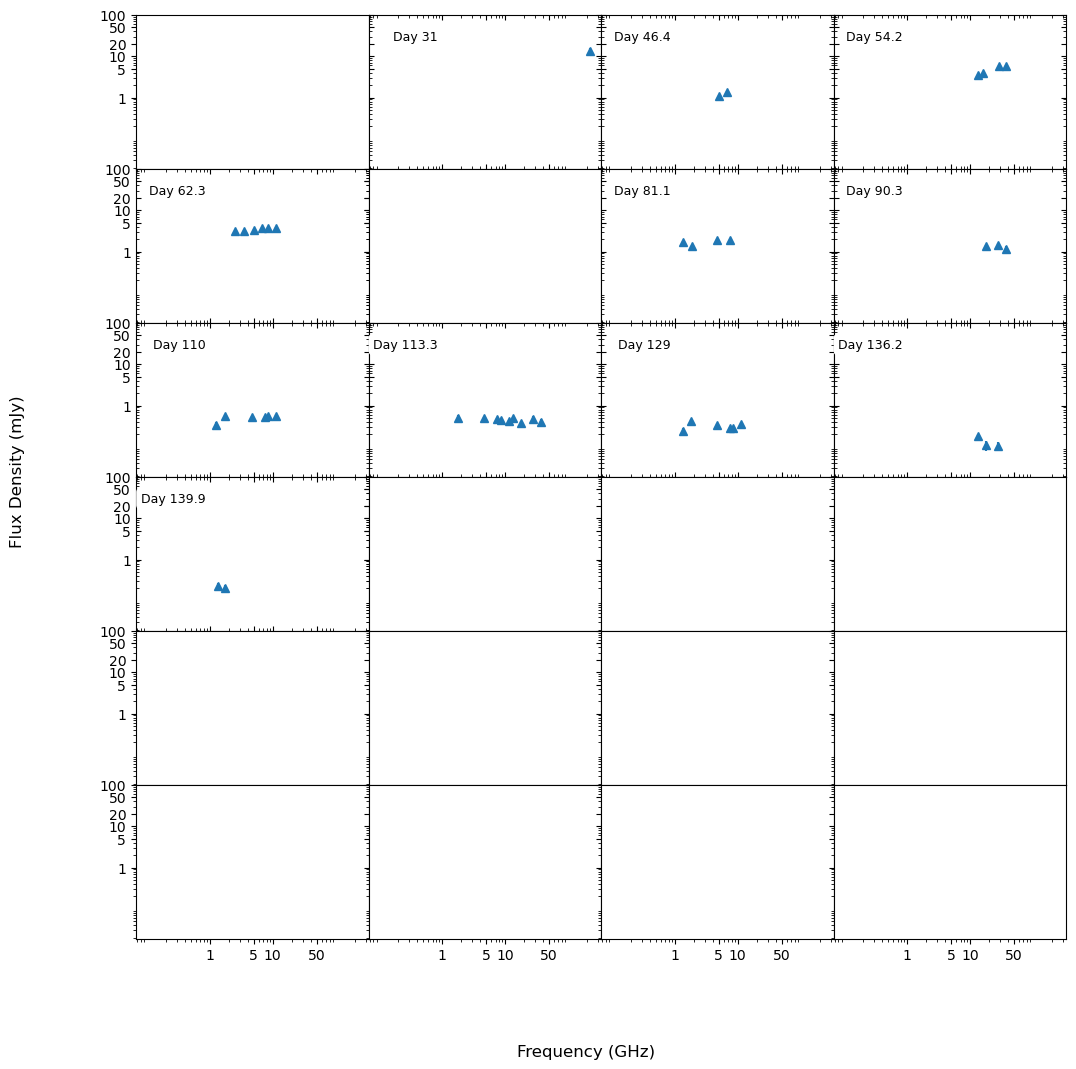

In [45]:

#putting them all in a list
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
       df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
       df21, df22, df23, df24]


#the days by the list so they can all be defined
annotations = ['Day 2.4', 'Day 31', 'Day 46.4', 'Day 54.2', 'Day 62.3', 'Day 79.9',
               'Day 81.1', 'Day 90.3', 'Day 110', 'Day 113.3', 'Day 129', 'Day 136.2',
               'Day 139.9', 'Day 193', 'Day 232.8', 'Day 246.6', 'Day 259.7',
               'Day 309.7', 'Day 320.6', 'Day 331.6', 'Day 403.4', 'Day 408.2',
               'Day 488.7', 'Day 492.7']

#making the figure (6,4) is the (rows, columns)
fig, ax = plt.subplots(6, 4, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

#loop for each of the datasets
for idx, (df, label) in enumerate(zip(dfs, annotations)):
    row, col = divmod(idx, 4)
    mask = df['Flux'] > 3 * df['error'] #don't show the non-detections
    if mask.any():
        ax[row, col].errorbar(df['Freq'][mask], df['Flux'][mask], yerr=df['error'][mask], fmt='^')
        ax[row, col].set_xscale('log')
        ax[row, col].set_yscale('log')
        ax[row, col].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
        ax[row, col].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
        ax[row, col].annotate(label, xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
        ax[row, col].tick_params(axis='both', which='both', direction='in', top=True, right=True)

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();

In [46]:
#Now cleaning it up so oit's not using all of those empty plots

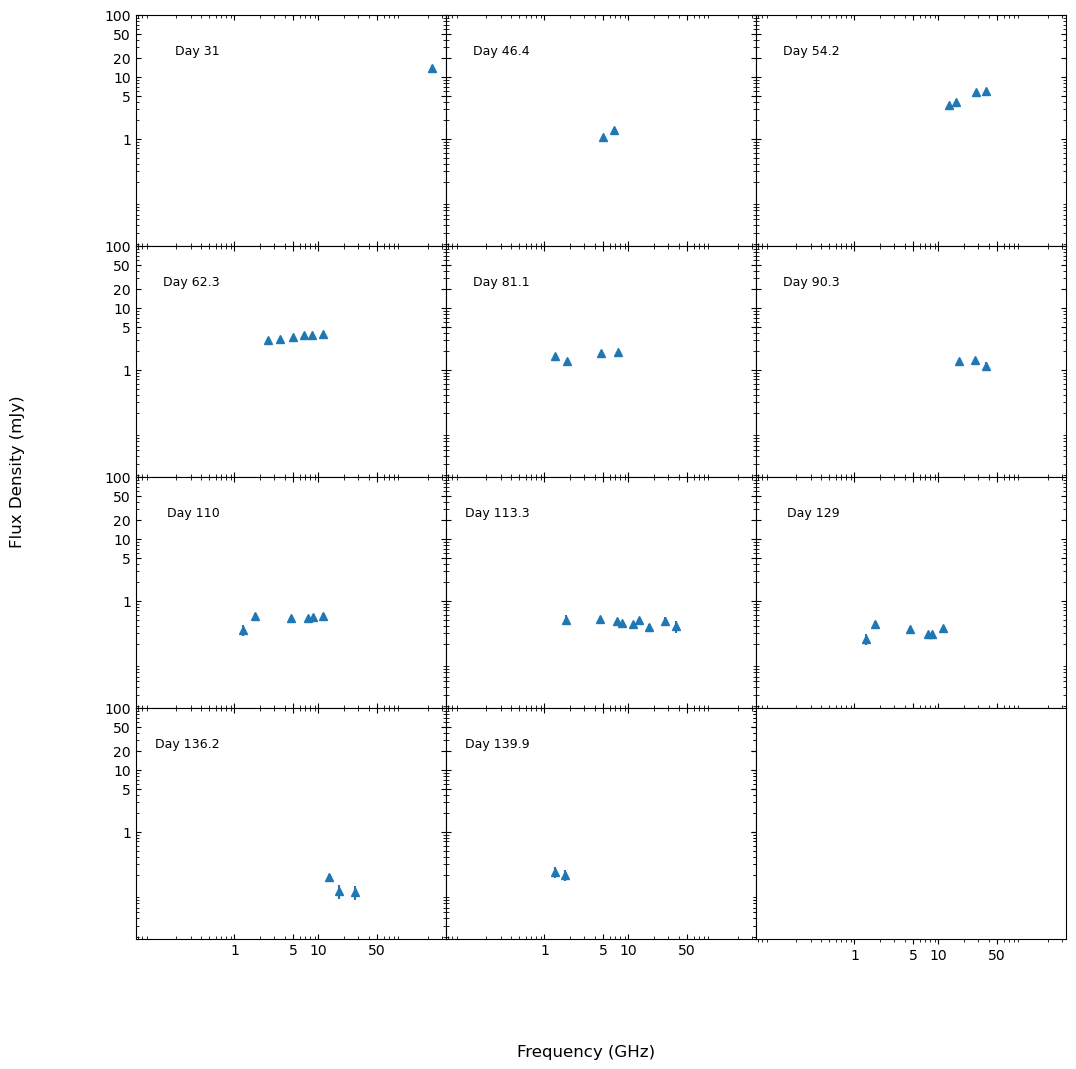

In [47]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
       df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
       df21, df22, df23, df24]


#the days by the list so they can all be defined
annotations = ['Day 2.4', 'Day 31', 'Day 46.4', 'Day 54.2', 'Day 62.3', 'Day 79.9',
               'Day 81.1', 'Day 90.3', 'Day 110', 'Day 113.3', 'Day 129', 'Day 136.2',
               'Day 139.9', 'Day 193', 'Day 232.8', 'Day 246.6', 'Day 259.7',
               'Day 309.7', 'Day 320.6', 'Day 331.6', 'Day 403.4', 'Day 408.2',
               'Day 488.7', 'Day 492.7']

#making the figure (6,4) is the (rows, columns)
fig, ax = plt.subplots(4, 3, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

mask = df2['Flux'] > 3 * df2['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0, 0].errorbar(df2['Freq'][mask], df2['Flux'][mask], yerr=df2['error'][mask], fmt='^')
    ax[0, 0].set_xscale('log')
    ax[0, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0, 0].set_yscale('log')
    ax[0, 0].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[0, 0].annotate('Day 31', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df3['Flux'] > 3 * df3['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0, 1].errorbar(df3['Freq'][mask], df3['Flux'][mask], yerr=df3['error'][mask], fmt='^')
    ax[0, 1].set_xscale('log')
    ax[0, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0, 1].set_yscale('log')
    ax[0, 1].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[0, 1].annotate('Day 46.4', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df4['Flux'] > 3 * df4['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0, 2].errorbar(df4['Freq'][mask], df4['Flux'][mask], yerr=df4['error'][mask], fmt='^')
    ax[0, 2].set_xscale('log')
    ax[0, 2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0, 2].set_yscale('log')
    ax[0, 2].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[0, 2].annotate('Day 54.2', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0, 2].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df5['Flux'] > 3 * df5['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1, 0].errorbar(df5['Freq'][mask], df5['Flux'][mask], yerr=df5['error'][mask], fmt='^')
    ax[1, 0].set_xscale('log')
    ax[1, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1, 0].set_yscale('log')
    ax[1, 0].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[1, 0].annotate('Day 62.3', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df7['Flux'] > 3 * df7['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1, 1].errorbar(df7['Freq'][mask], df7['Flux'][mask], yerr=df7['error'][mask], fmt='^')
    ax[1, 1].set_xscale('log')
    ax[1, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1, 1].set_yscale('log')
    ax[1, 1].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[1, 1].annotate('Day 81.1', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df8['Flux'] > 3 * df8['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1, 2].errorbar(df8['Freq'][mask], df8['Flux'][mask], yerr=df8['error'][mask], fmt='^')
    ax[1, 2].set_xscale('log')
    ax[1, 2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1, 2].set_yscale('log')
    ax[1, 2].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[1, 2].annotate('Day 90.3', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1, 2].tick_params(axis='both', which='both', direction='in', top=True, right=True)




mask = df9['Flux'] > 3 * df9['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2, 0].errorbar(df9['Freq'][mask], df9['Flux'][mask], yerr=df9['error'][mask], fmt='^')
    ax[2, 0].set_xscale('log')
    ax[2, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2, 0].set_yscale('log')
    ax[2, 0].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[2, 0].annotate('Day 110', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df10['Flux'] > 3 * df10['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2, 1].errorbar(df10['Freq'][mask], df10['Flux'][mask], yerr=df10['error'][mask], fmt='^')
    ax[2, 1].set_xscale('log')
    ax[2, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2, 1].set_yscale('log')
    ax[2, 1].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[2, 1].annotate('Day 113.3', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df11['Flux'] > 3 * df11['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2, 2].errorbar(df11['Freq'][mask], df11['Flux'][mask], yerr=df11['error'][mask], fmt='^')
    ax[2, 2].set_xscale('log')
    ax[2, 2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2, 2].set_yscale('log')
    ax[2, 2].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[2, 2].annotate('Day 129', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2, 2].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df12['Flux'] > 3 * df12['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3, 0].errorbar(df12['Freq'][mask], df12['Flux'][mask], yerr=df12['error'][mask], fmt='^')
    ax[3, 0].set_xscale('log')
    ax[3, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3, 0].set_yscale('log')
    ax[3, 0].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[3, 0].annotate('Day 136.2', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df13['Flux'] > 3 * df13['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3, 1].errorbar(df13['Freq'][mask], df13['Flux'][mask], yerr=df13['error'][mask], fmt='^')
    ax[3, 1].set_xscale('log')
    ax[3, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3, 1].set_yscale('log')
    ax[3, 1].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
    ax[3, 1].annotate('Day 139.9', xy=(60, 145), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)


    
fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();

In [48]:
#Making it more defined

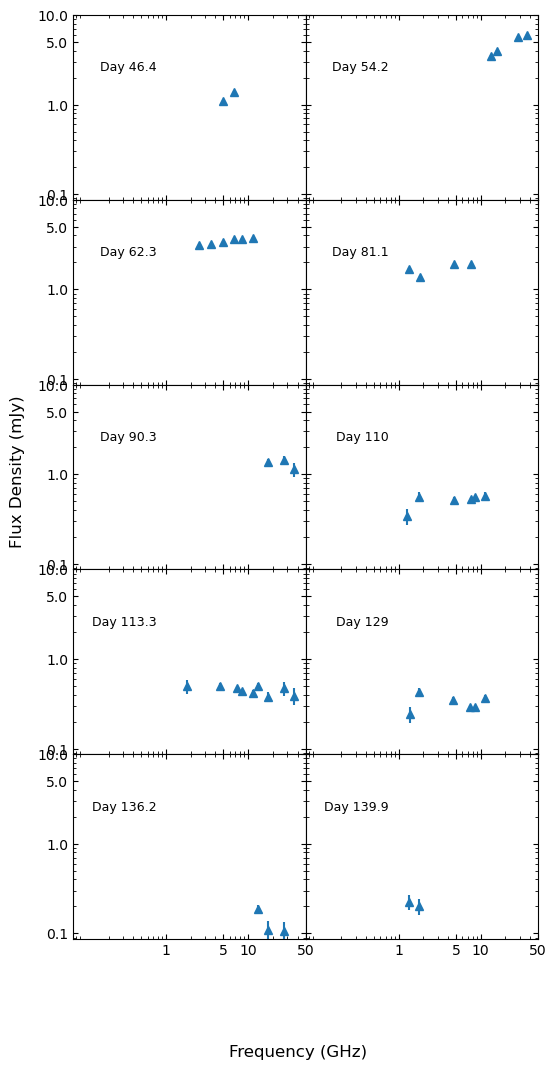

In [54]:
#making the figure (6,4) is the (rows, columns)
fig, ax = plt.subplots(5, 2, sharex='all', sharey='all')
fig.set_size_inches(6, 12)
fig.subplots_adjust(hspace=0, wspace=0)


mask = df3['Flux'] > 3 * df3['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0, 0].errorbar(df3['Freq'][mask], df3['Flux'][mask], yerr=df3['error'][mask], fmt='^')
    ax[0, 0].set_xscale('log')
    ax[0, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0, 0].set_yscale('log')
    ax[0, 0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0, 0].annotate('Day 46.4', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df4['Flux'] > 3 * df4['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0, 1].errorbar(df4['Freq'][mask], df4['Flux'][mask], yerr=df4['error'][mask], fmt='^')
    ax[0, 1].set_xscale('log')
    ax[0, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0, 1].set_yscale('log')
    ax[0, 1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0, 1].annotate('Day 54.2', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df5['Flux'] > 3 * df5['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1, 0].errorbar(df5['Freq'][mask], df5['Flux'][mask], yerr=df5['error'][mask], fmt='^')
    ax[1, 0].set_xscale('log')
    ax[1, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1, 0].set_yscale('log')
    ax[1, 0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1, 0].annotate('Day 62.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df7['Flux'] > 3 * df7['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1, 1].errorbar(df7['Freq'][mask], df7['Flux'][mask], yerr=df7['error'][mask], fmt='^')
    ax[1, 1].set_xscale('log')
    ax[1, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1, 1].set_yscale('log')
    ax[1, 1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1, 1].annotate('Day 81.1', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df8['Flux'] > 3 * df8['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2, 0].errorbar(df8['Freq'][mask], df8['Flux'][mask], yerr=df8['error'][mask], fmt='^')
    ax[2, 0].set_xscale('log')
    ax[2, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2, 0].set_yscale('log')
    ax[2, 0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2, 0].annotate('Day 90.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df9['Flux'] > 3 * df9['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2, 1].errorbar(df9['Freq'][mask], df9['Flux'][mask], yerr=df9['error'][mask], fmt='^')
    ax[2, 1].set_xscale('log')
    ax[2, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2, 1].set_yscale('log')
    ax[2, 1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2, 1].annotate('Day 110', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df10['Flux'] > 3 * df10['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3, 0].errorbar(df10['Freq'][mask], df10['Flux'][mask], yerr=df10['error'][mask], fmt='^')
    ax[3, 0].set_xscale('log')
    ax[3, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3, 0].set_yscale('log')
    ax[3, 0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3, 0].annotate('Day 113.3', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df11['Flux'] > 3 * df11['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3, 1].errorbar(df11['Freq'][mask], df11['Flux'][mask], yerr=df11['error'][mask], fmt='^')
    ax[3, 1].set_xscale('log')
    ax[3, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3, 1].set_yscale('log')
    ax[3, 1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3, 1].annotate('Day 129', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)



mask = df12['Flux'] > 3 * df12['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4, 0].errorbar(df12['Freq'][mask], df12['Flux'][mask], yerr=df12['error'][mask], fmt='^')
    ax[4, 0].set_xscale('log')
    ax[4, 0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4, 0].set_yscale('log')
    ax[4, 0].set_yticks([.1, 1, 5, 10, 20, 50], labels=['0.1','1.0', '5.0', '10.0', '20.0', '50.0'])
    
    ax[4, 0].annotate('Day 136.2', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4, 0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df13['Flux'] > 3 * df13['error']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4, 1].errorbar(df13['Freq'][mask], df13['Flux'][mask], yerr=df13['error'][mask], fmt='^')
    ax[4, 1].set_xscale('log')
    ax[4, 1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4, 1].set_yscale('log')
    ax[4, 1].set_yticks([.1, 1, 5, 10], labels=['0.1','1.0', '5.0', '10.0'])
    ax[4, 1].annotate('Day 139.9', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4, 1].tick_params(axis='both', which='both', direction='in', top=True, right=True)


    
fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();